### Chapter 6 - Outlier Handling

#### 6.2. Outlier Trimming

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


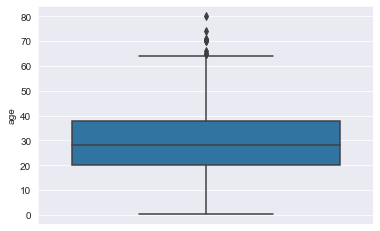

In [2]:
sns.boxplot( y='age', data=titanic_data)

In [3]:
IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25)

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR * 1.5)
upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR * 1.5)

print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


In [4]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True,
                       np.where(titanic_data["age"] < lower_age_limit, True, False))

In [5]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers), ]

titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

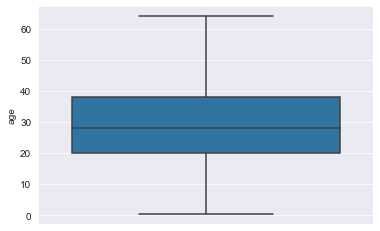

In [6]:
sns.boxplot( y='age', data = titanic_without_age_outliers)

#### 6.3. Outlier Capping Using IQR

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

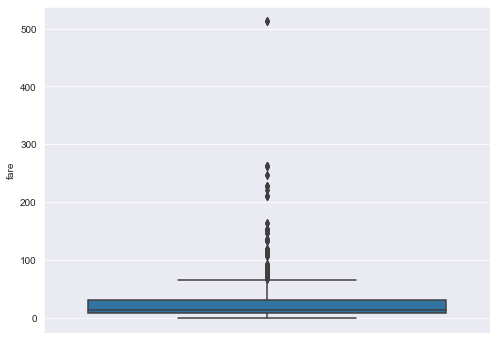

In [8]:
sns.boxplot( y='fare', data=titanic_data)

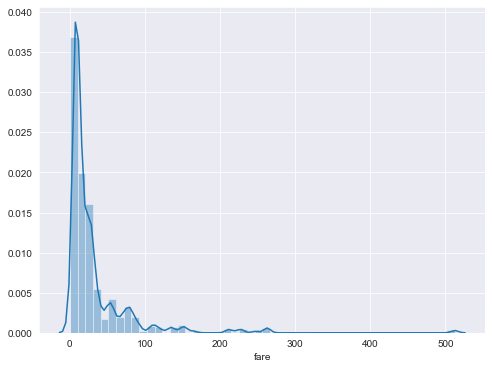

In [9]:
sns.distplot(titanic_data['fare'])

In [10]:
IQR = titanic_data["fare"].quantile(0.75) - titanic_data["fare"].quantile(0.25)

lower_fare_limit = titanic_data["fare"].quantile(0.25) - (IQR * 1.5)
upper_fare_limit = titanic_data["fare"].quantile(0.75) + (IQR * 1.5)

print(lower_fare_limit)
print(upper_fare_limit)

-26.724
65.6344


In [11]:
titanic_data["fare"]= np.where(titanic_data["fare"] > upper_fare_limit, upper_fare_limit,
                       np.where(titanic_data["fare"] < lower_fare_limit, lower_fare_limit, titanic_data["fare"]))

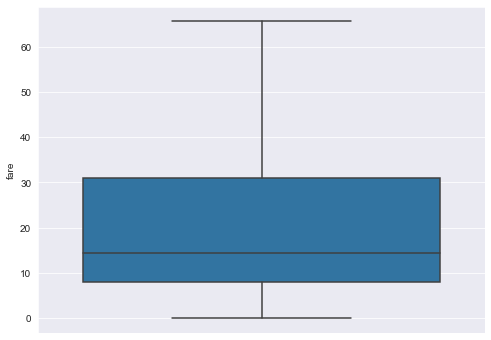

In [12]:
sns.boxplot( y='fare', data=titanic_data)

#### 6.4. Outlier Capping Using Mean & Standard Deviation

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

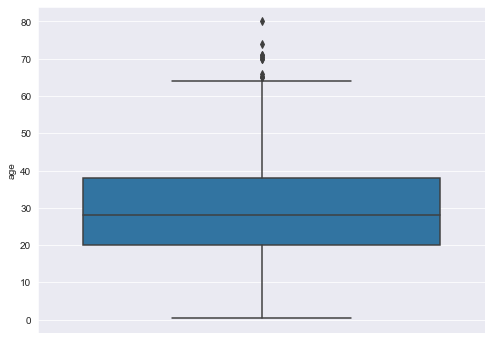

In [14]:
sns.boxplot( y='age', data=titanic_data)

In [15]:

lower_age_limit = titanic_data["age"].mean() - (3 * titanic_data["age"].std())
upper_age_limit = titanic_data["age"].mean() + (3 * titanic_data["age"].std())

print(lower_age_limit)
print(upper_age_limit)

-13.88037434994331
73.27860964406095


In [16]:
titanic_data["age"]= np.where(titanic_data["age"] > upper_age_limit, upper_age_limit,
                       np.where(titanic_data["age"] < lower_age_limit, lower_age_limit, titanic_data["age"]))

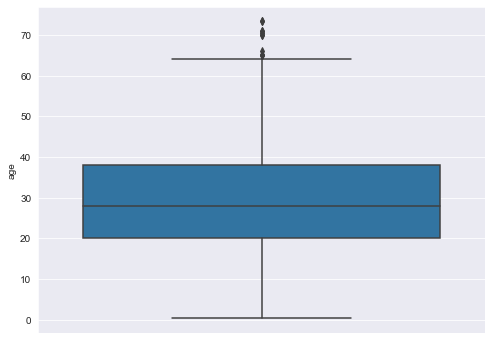

In [17]:
sns.boxplot( y='age', data=titanic_data)

#### 6.5. Outlier Capping Using Quantiles

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')


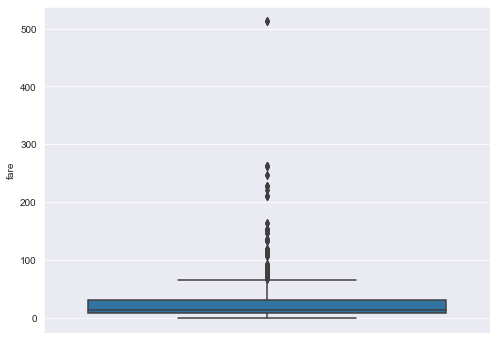

In [19]:
sns.boxplot( y='fare', data=titanic_data)

In [20]:
lower_fare_limit = titanic_data["fare"].quantile(0.05) 
upper_fare_limit = titanic_data["fare"].quantile(0.95)

print(lower_fare_limit)
print(upper_fare_limit)

7.225
112.07915


In [21]:
titanic_data["fare"]= np.where(titanic_data["fare"] > upper_fare_limit, upper_fare_limit,
                       np.where(titanic_data["fare"] < lower_fare_limit, lower_fare_limit, titanic_data["fare"]))

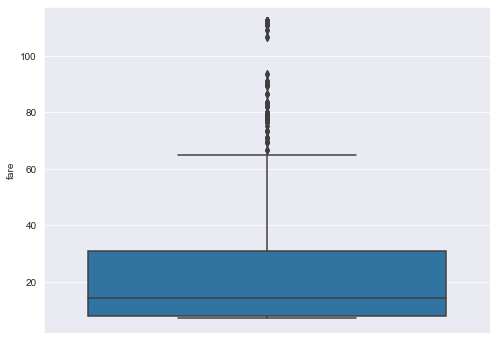

In [22]:
sns.boxplot( y='fare', data=titanic_data)

#### 6.5. Outlier Capping Using Custom Values

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]

sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')
print(titanic_data.age.max())
print(titanic_data.age.min())

80.0
0.42


In [24]:
titanic_data["age"]= np.where(titanic_data["age"] > 50, 50,
                       np.where(titanic_data["age"] < 10, 10, titanic_data["age"]))

In [25]:
print(titanic_data.age.max())
print(titanic_data.age.min())

50.0
10.0


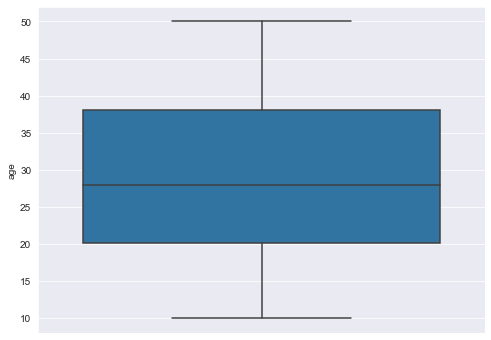

In [26]:
sns.boxplot( y='age', data=titanic_data)

### Exercise 6.1

#### Question 1

Which of the following techniques can be used to remove outliers from a dataset?

A. Trimming \
B. Censoring \
C. Discretization \
D. All of the above

Answer: D

#### Question 2

What IQR distance is normally used to cap outliers via IQR.

A. 2.0 \
B. 3.0\
C. 1.5 \
D. 1.0

Answer: C

#### Question 3

What quartile distance is normally used to cap outliers via mean and standard deviation.

A. 2.0 \
B. 3.0\
C. 1.5 \
D. 1.0

Answer: B

### Exercise 6.2

On the `price` column of the following `diamonds`dataset, apply outlier capping via IQR. Display box plot for the `price` column after outlier capping.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Solution

7.225
112.07915


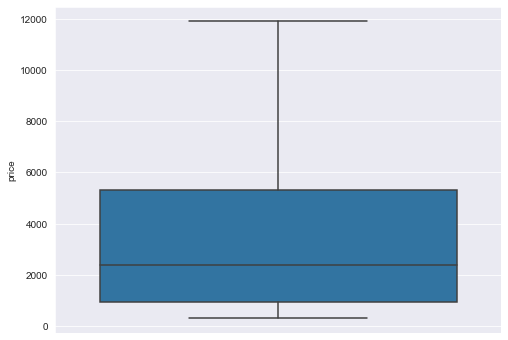

In [42]:
IQR = diamond_data["price"].quantile(0.75) - diamond_data["price"].quantile(0.25)

lower_price_limit = diamond_data["price"].quantile(0.25) - (IQR * 1.5)
upper_price_limit = diamond_data["price"].quantile(0.75) + (IQR * 1.5)

print(lower_fare_limit)
print(upper_fare_limit)

diamond_data["price"]= np.where(diamond_data["price"] > upper_price_limit , upper_price_limit ,
                       np.where(diamond_data["price"] < lower_price_limit , lower_price_limit , diamond_data["price"]))

sns.boxplot( y='price', data=diamond_data)